<a href="https://colab.research.google.com/github/WilliamAshbee/computervision/blob/main/homework2/HarrisCornerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray

#img = imread('chess.jpg')

import matplotlib.pyplot as plt
import numpy as np

In [2]:
imggray = np.zeros((20,20))
imggray[10:,10:] = 1.0

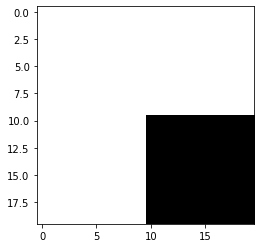

In [3]:
# imggray = rgb2gray(img)
# imggray = imggray[30:40,30:40]
plt.imshow(imggray,cmap='Greys')

In [4]:
def getKernel():
  x = np.linspace(-2,2,5)
  y = np.linspace(-2,2,5)
  g = np.zeros((5,5))
  for i in range(5):
    for j in range(5):
      g[i,j] = np.exp((-x[i]**2-y[j]**2)/2.0)/(2.0*np.pi)
  return g

In [5]:
g = getKernel()

In [6]:
print(g)

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


In [7]:
ones = np.ones((5,5))

In [8]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(imagePadded.shape[1]):
        # Exit Convolution
        if y > imagePadded.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(imagePadded.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > imagePadded.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [9]:
print(convolve2D(ones, g, padding=2, strides=1))

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.48289153 0.65103795 0.68855648 0.65103795 0.48289153]
 [0.65103795 0.8777342  0.92831697 0.8777342  0.65103795]
 [0.68855648 0.92831697 0.98181476 0.92831697 0.68855648]
 [0.65103795 0.8777342  0.92831697 0.8777342  0.65103795]
 [0.48289153 0.65103795 0.68855648 0.65103795 0.48289153]]


In [10]:
from google.colab import drive
#drive.mount('/content/drive')

In [11]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

In [12]:
Ixx = convolve2D(I_x**2,g)
Iyy = convolve2D(I_y**2,g)
Ixy = convolve2D(I_x*I_y,g)

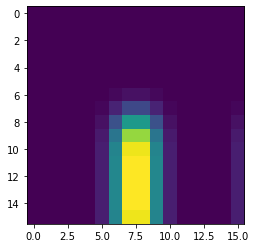

In [13]:
plt.imshow(Ixx)

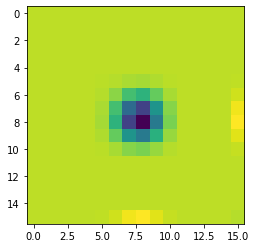

In [14]:
plt.imshow(Ixy)

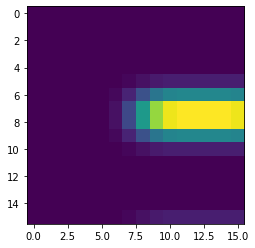

In [15]:
plt.imshow(Iyy)

In [16]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2


In [17]:
print(np.max(detA))
print(np.max(traceA))

25.868232543195894
11.092062962517188


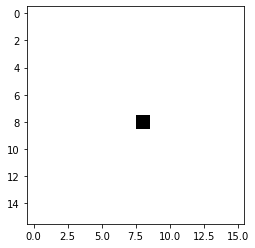

In [18]:
plt.imshow(harris_response>np.max(harris_response)-1, cmap='Greys')

In [19]:
print(np.argmax(harris_response)//16,(np.argmax(harris_response)/16-np.argmax(harris_response)//16)*16)

8 8.0
